# Practical Assignment 2 - Explainable Artificial Iintelligence

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Task 1: Dataset and Learning Task


In [70]:
df = pd.read_csv("airline_passenger_satisfaction.csv")

In [71]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [72]:
df.drop_duplicates(inplace=True)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [85]:
df = df.dropna()

In [86]:
df.describe()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,0.492590,0.000053,0.816862,0.309236,0.593704,-0.000106,14.643385,15.091129,3.057349,...,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886,0.434499
std,37489.781165,0.499947,0.999887,0.386781,0.462180,0.621371,1.000113,37.932867,38.465650,1.526787,...,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082,0.495693
min,1.000000,0.000000,-2.144805,0.000000,0.000000,0.000000,-1.162282,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,32494.500000,0.000000,-0.821993,1.000000,0.000000,0.000000,-0.778302,0.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000
50%,64972.000000,0.000000,0.037835,1.000000,0.000000,1.000000,-0.347202,0.000000,0.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,97415.500000,1.000000,0.765382,1.000000,1.000000,1.000000,0.555100,12.000000,13.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,129880.000000,1.000000,3.014163,1.000000,1.000000,2.000000,3.802385,1592.000000,1584.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [87]:
# Contagem de valores únicos para todas as colunas
for column in df.columns:
    print(f"Contagem de valores únicos na coluna {column}:")
    print(df[column].unique())
    print()


Contagem de valores únicos na coluna ID:
[     1      2      3 ... 129878 129879 129880]

Contagem de valores únicos na coluna Gender:
[1 0]

Contagem de valores únicos na coluna Age:
[ 0.56696027 -0.2928678   0.10397593  0.69924151  0.63310089  0.23625717
  1.36064772 -0.09444593 -0.75585214 -0.82199276 -1.02041462 -2.01252393
  0.83152275  2.02205392  1.42678834 -1.88024269  0.17011655 -1.68182083
  1.09608524  2.48503827  0.76538213  0.50081965  1.22836648  0.03783531
 -1.21883648 -0.42514904 -0.02830531  0.963804    0.43467903  0.36853841
 -1.08655524 -1.2849771   0.30239779 -0.16058655 -0.22672718  1.16222586
 -0.55743028  0.89766337 -0.954274    1.02994462  2.15433517 -1.35111772
  1.69135082 -0.49128966  2.68346013 -2.14480517 -0.35900842 -1.41725835
 -1.81410207 -0.88813338 -1.48339897  1.75749144  1.88977268  1.82363206
  1.2945071   1.9559133  -1.54953959 -1.15269586  1.6252102  -0.68971152
 -1.94638331  2.08819454 -0.6235709   1.49292896  1.55906958 -2.07866455
 -1.61568021 

In [88]:
# Criar uma cópia do DataFrame para evitar alterações no original
df_encoded = df.copy()

# Identificar colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder para cada coluna categórica
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
df_encoded.head()

df = df_encoded
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,0.566960,0,0,0,-0.370261,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,-0.292868,1,0,0,-0.370261,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,0.103976,1,0,0,-0.338179,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,0.699242,1,0,0,0.716512,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,0.633101,1,0,0,2.285515,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


In [89]:
# Padronização (média = 0, desvio padrão = 1)
scaler = StandardScaler()
df[['Age', 'Flight Distance']] = scaler.fit_transform(df[['Age', 'Flight Distance']])
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,0.566973,0,0,0,-0.370115,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,-0.292955,1,0,0,-0.370115,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,0.103935,1,0,0,-0.338036,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,0.699270,1,0,0,0.716540,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,0.633122,1,0,0,2.285372,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


### Pre-Modelling XAI Techniques

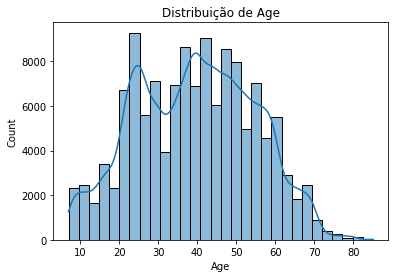

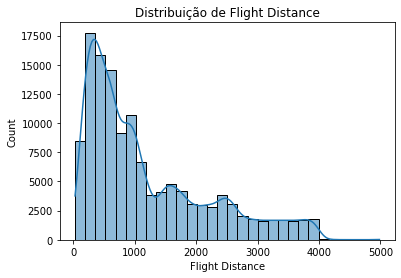

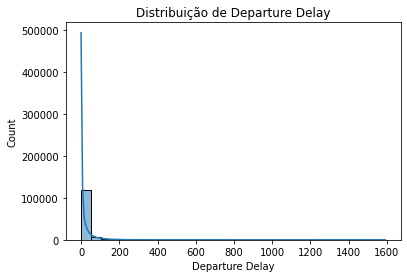

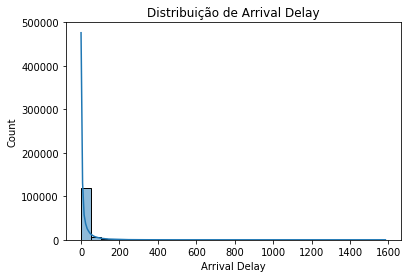

In [53]:
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

for col in numeric_columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.show()


C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


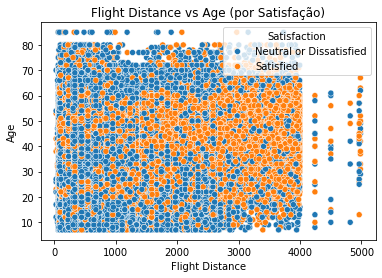

In [54]:
sns.scatterplot(data=df, x='Flight Distance', y='Age', hue='Satisfaction')
plt.title('Flight Distance vs Age (por Satisfação)')
plt.show()


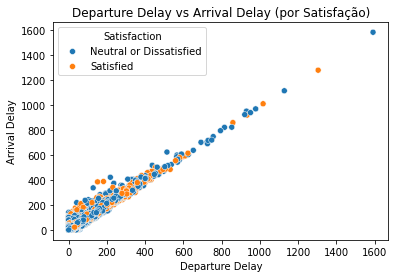

In [55]:
sns.scatterplot(data=df, x='Departure Delay', y='Arrival Delay', hue='Satisfaction')
plt.title('Departure Delay vs Arrival Delay (por Satisfação)')
plt.show()


You can see that the points lined up more or less along a straight line going from the lower left corner to the upper right. Thus, in some approximation the dependence of the arrival time delay on the departure time delay is linear.

The results obtained are quite logical and can be explained as follows. If the flight of the airline's customers was delayed by a certain amount of time at departure, then the flight will be delayed by about the same amount of time at landing (provided that the aircraft does not accelerate in flight to make up for lost time).

C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


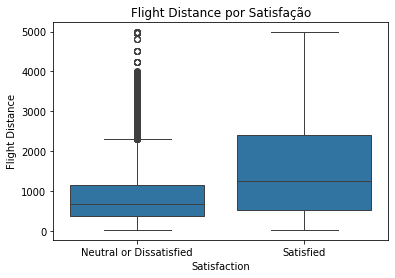

C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


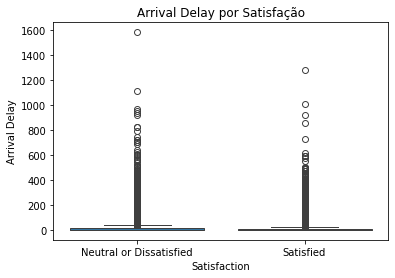

In [56]:
sns.boxplot(data=df, x='Satisfaction', y='Flight Distance')
plt.title('Flight Distance por Satisfação')
plt.show()

sns.boxplot(data=df, x='Satisfaction', y='Arrival Delay')
plt.title('Arrival Delay por Satisfação')
plt.show()

C:\Users\UTILIZADOR\AppData\Local\Temp\ipykernel_43892\3445852697.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Satisfaction", data=df, palette="pastel")
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_k

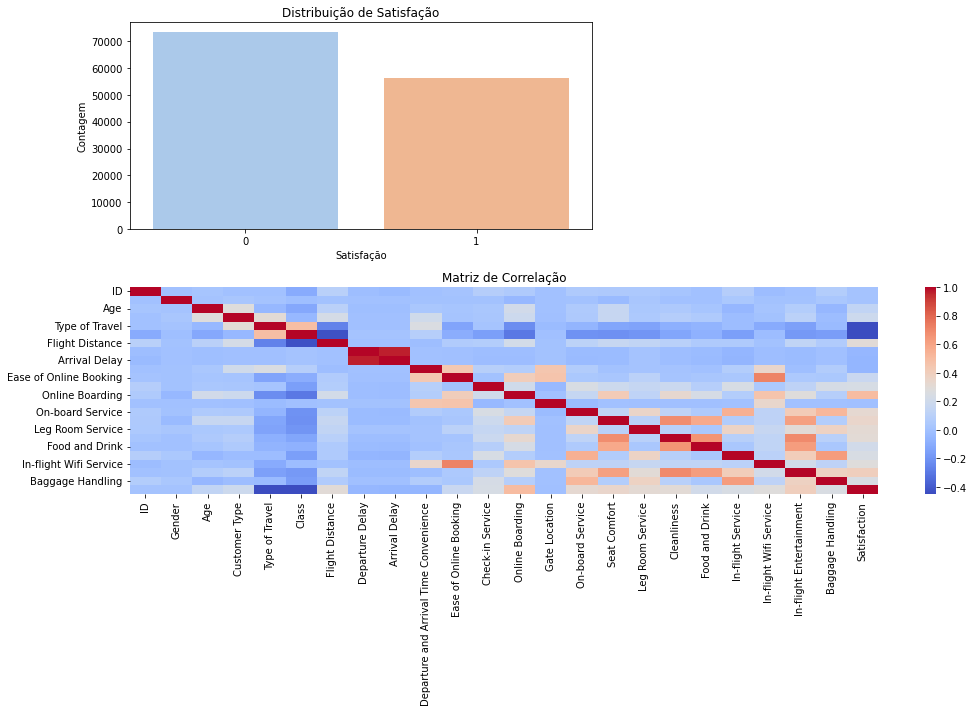

In [105]:
# Configurações para visualização
plt.figure(figsize=(15, 10))

# 1. Distribuição da variável alvo (Satisfaction)
plt.subplot(2, 2, 1)
sns.countplot(x="Satisfaction", data=df, palette="pastel")
plt.title("Distribuição de Satisfação")
plt.xlabel("Satisfação")
plt.ylabel("Contagem")


# 3. Correlação entre variáveis contínuas
plt.subplot(2, 1, 2)
correlation = df.corr()
sns.heatmap(correlation, annot=False, cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação")

plt.tight_layout()
plt.show()


**Análise Exploratória Inicial**

- **Distribuição da variável alvo (Satisfaction):**

Maior parte dos passageiros está na categoria "Neutral or Dissatisfied", indicando um leve desbalanceamento na variável-alvo.

- **Distribuição de idades:**

A maioria dos passageiros está na faixa etária de 20 a 50 anos, com um pico em torno dos 40 anos.

- **Correlação entre variáveis contínuas:**

Algumas correlações notáveis podem ser observadas, como entre Departure Delay e Arrival Delay.
No entanto, as variáveis relacionadas a serviços a bordo parecem estar fortemente correlacionadas entre si.

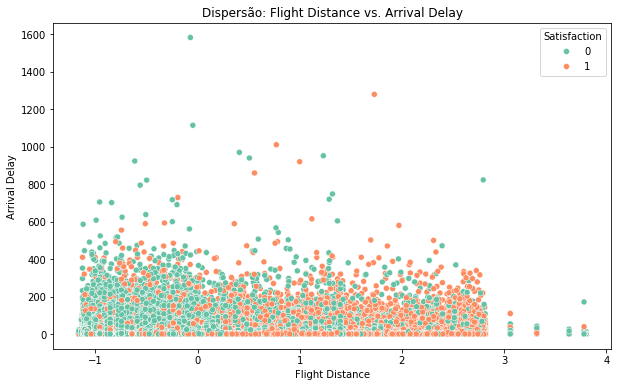

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo: Flight Distance vs. Arrival Delay, colorido por Satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Flight Distance",
    y="Arrival Delay",
    hue="Satisfaction",
    palette="Set2"
)
plt.title("Dispersão: Flight Distance vs. Arrival Delay")
plt.xlabel("Flight Distance")
plt.ylabel("Arrival Delay")
plt.legend(title="Satisfaction")
plt.show()


Podemos verque em voos de curta distancia e com delay, normalmente a satifação é Neutral or Dissatisfied

C:\Users\UTILIZADOR\AppData\Local\Temp\ipykernel_43892\2797135070.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning

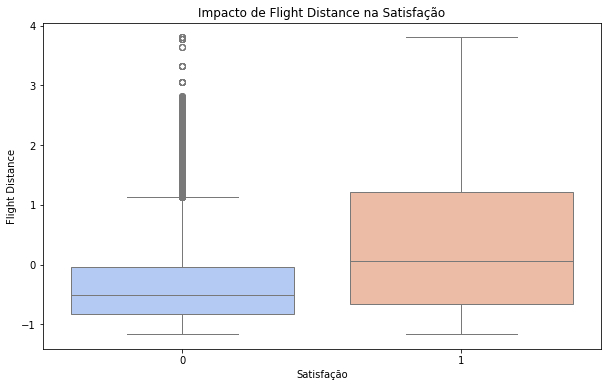

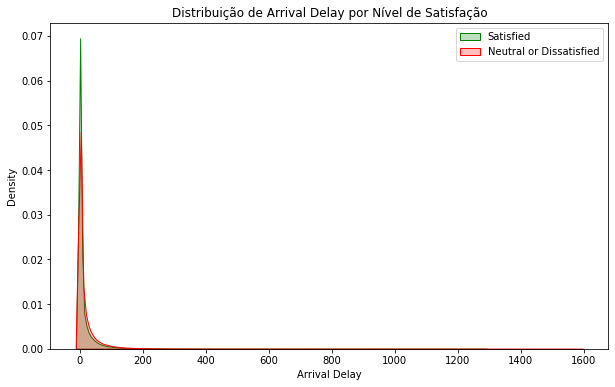

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Variável contínua por Satisfação
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Satisfaction",
    y="Flight Distance",
    palette="coolwarm"
)
plt.title("Impacto de Flight Distance na Satisfação")
plt.xlabel("Satisfação")
plt.ylabel("Flight Distance")
plt.show()

# Density Plot: Distribuição de Arrival Delay por Satisfação
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df[df["Satisfaction"] == 1],
    x="Arrival Delay",
    fill=True,
    label="Satisfied",
    color="green"
)
sns.kdeplot(
    data=df[df["Satisfaction"] == 0],
    x="Arrival Delay",
    fill=True,
    label="Neutral or Dissatisfied",
    color="red"
)
plt.title("Distribuição de Arrival Delay por Nível de Satisfação")
plt.xlabel("Arrival Delay")
plt.legend()
plt.show()


C:\Users\UTILIZADOR\AppData\Local\Temp\ipykernel_43892\3659616315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd

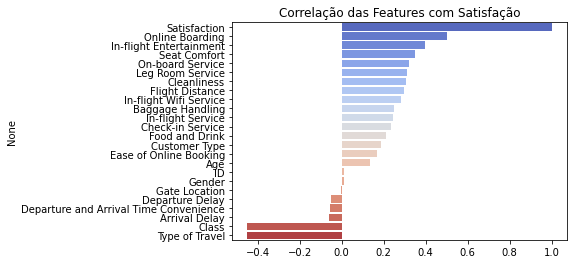

In [104]:
corr = df.corr()["Satisfaction"].sort_values(ascending=False)  # Convert 'Satisfaction' para valores numéricos
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("Correlação das Features com Satisfação")
plt.show()


**Correlação Alta**

- Online Boarding: É a feature mais correlacionada positivamente com a satisfação, sugerindo que um sistema eficiente de embarque online aumenta significativamente a satisfação dos passageiros.
- In-flight Entertainment e Seat Comfort: Estas variáveis indicam que a experiência a bordo, como o conforto e o entretenimento, tem um impacto direto na percepção positiva do cliente.
- On-board Service e Leg Room Service: Aspectos de conforto físico e atendimento dentro do avião também são altamente valorizados pelos passageiros.
 - **Interpretação:** Fatores relacionados à experiência dentro da aeronave e facilidades digitais são determinantes para uma boa satisfação do cliente.

**Correlação Perto de Zero:**

- Age, Ease of Online Booking, Food and Drink: Estas variáveis mostram pouca correlação com a satisfação, sugerindo que têm pouca influência direta.
- Gate Location e Convenience: Embora possam ser importantes em outros contextos, têm impacto mínimo sobre a satisfação, indicando que outros fatores são mais críticos.

**Correlação Negativa Alta:**

- Type of Travel e Class: A classe de viagem e o tipo de viagem (provavelmente business vs. economy) têm correlação negativa significativa. Isso pode indicar que passageiros viajando em certas condições (como econômica ou viagens não corporativas) tendem a relatar menor satisfação.
- Arrival Delay e Departure Delay: Atrasos têm uma correlação negativa clara com a satisfação, sugerindo que minimizar atrasos é fundamental para melhorar a experiência do cliente.

## Task 2: In-Modeling Explanations

In [33]:
X = df.drop(['ID', 'Satisfaction'], axis=1)
y = df['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Decision Tree

Para este projeto decidimos utilizar primeiramente uma árvore de decisão pois:
- As árvores de decisão são fáceis de interpretar e visualizar, especialmente quando comparadas a modelos mais complexos.
- Árvores de decisão geram regras claras, como "se In-flight WiFi Service <= 0.5, então classe = insatisfeito".

In [34]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = tree_model.predict(X_test)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.9048352325223283
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     22110
           1       0.90      0.87      0.89     16854

    accuracy                           0.90     38964
   macro avg       0.90      0.90      0.90     38964
weighted avg       0.90      0.90      0.90     38964



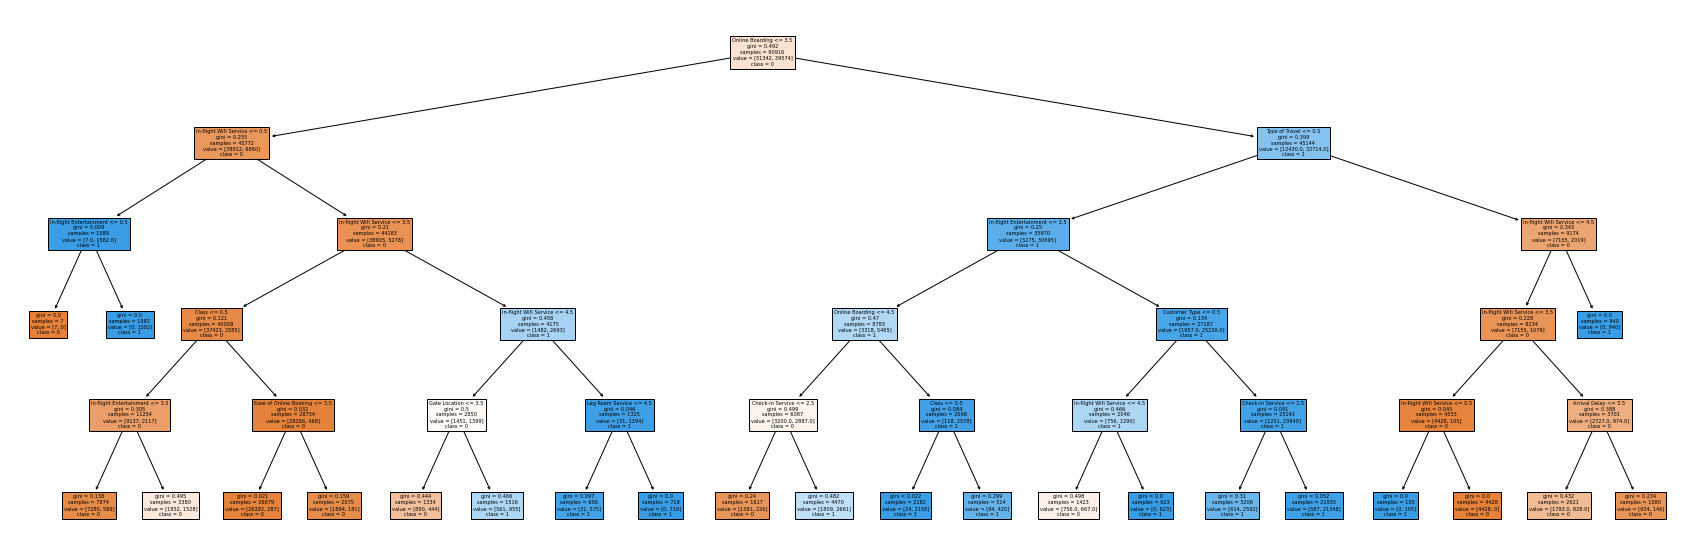

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plot_tree(
    tree_model, 
    feature_names=X.columns, 
    class_names=[str(cls) for cls in tree_model.classes_],  # Converte para strings
    filled=True
)
plt.savefig("decision_tree.png", dpi=300, bbox_inches="tight")  # Salvar como PNG com alta resolução
plt.show()


**Pontos Positivos sobre a Interpretabilidade**

- **Clareza da Estrutura de Decisão:**

A árvore de decisão é uma técnica de aprendizado de máquina considerada "glass-box" (caixa de vidro). Ela permite que o processo de tomada de decisão seja totalmente transparente.
Cada nó na árvore representa uma decisão baseada em uma característica específica, e os caminhos da raiz até as folhas mostram como as classificações foram realizadas.

- **Facilidade para Entendimento Humano:**

A árvore é fácil de interpretar para humanos, mesmo sem conhecimentos profundos em aprendizado de máquina.
Decisões como "Online Boarding <= 3.5" no primeiro nó oferecem uma interpretação intuitiva: o serviço de Online Boarding no voo tem impacto inicial na satisfação do cliente.

- **Hierarquia das Variáveis:**

As características mais importantes aparecem nos níveis superiores da árvore, indicando sua relevância. Por exemplo, "Online Boarding" , "Type of Travel" and " In-Flight Wifi Service" aparecem logo no início, sugerindo que são as variável mais discriminativa para a previsão de satisfação.

- **Análise por Cenários:**

O modelo é útil para explorar diferentes cenários. Por exemplo, um gerente pode usar essa árvore para entender como mudanças em "Online Boarding" ou "In-flight Entertainment" afetam a satisfação.


**Limitações na Interpretabilidade**

- **Complexidade da Árvore:**

Apesar de ser visualmente compreensível, a árvore gerada é relativamente grande e contém muitos nós, dificultando a análise completa.
Árvores mais profundas podem levar a overfitting e perder generalização.

- **Dependência de Divisões Binárias:**

As divisões são baseadas em cortes simples, como <= 0.5. Isso ignora relações não lineares ou interações mais complexas entre variáveis.

- **Possível Redundância de Variáveis:**

Variáveis como "In-flight Entertainment" e "In-flight WiFi Service" aparecem várias vezes. Isso pode ser difícil de explicar para um público geral ou gestores.

Análise de Importância das Variáveis:

Fazer comparaçao com a analise feito na primeira parte
A partir do modelo treinado, analisar a importância global de cada variável (e.g., feature_importances_ do sklearn) para confirmar se as variáveis mais importantes fazem sentido.
